# Модуль для работы с массивами `numpy`

In [1]:
import numpy as np

a = np.array([1, 10, 55.3, -1e23])
print(a)
print(2 * a)
print(a**2)
print(a.shape)
print(a.size)
assert np.prod(a.shape) == a.size
assert len(a.shape) == a.ndim
print(a.dtype)
print(type(a))

[ 1.00e+00  1.00e+01  5.53e+01 -1.00e+23]
[ 2.000e+00  2.000e+01  1.106e+02 -2.000e+23]
[1.00000e+00 1.00000e+02 3.05809e+03 1.00000e+46]
(4,)
4
float64
<class 'numpy.ndarray'>


In [2]:
b = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])
print(b)
print(2 * b)
print(b * [2, 3, 4])
print(b.shape)
print(b.size)
assert np.prod(a.shape) == a.size
assert len(b.shape) == b.ndim
print(b.dtype)
print(type(b))

[[9 8 7]
 [6 5 4]
 [3 2 1]]
[[18 16 14]
 [12 10  8]
 [ 6  4  2]]
[[18 24 28]
 [12 15 16]
 [ 6  6  4]]
(3, 3)
9
int64
<class 'numpy.ndarray'>


In [3]:
int_b = b.astype(int)
print(int_b.dtype)
print(int_b[0,0]**30, int(b[0,0])**30, 'Почему числа не равны?')

int64
-3535985420588157519 42391158275216203514294433201 Почему числа не равны?


## Создание массивов

In [4]:
a = np.arange(10)  # как range, но создает numpy.ndarray
print(a)
a = np.arange(10, -1, -1)
print(a)
# Если мы хотим создать сетку, то лучше не использовать эту функцию
# Смотрите сами, предположим нам нужны точки от 0 до 2 включительно c шагом 1/3:
a = np.arange(0, 2 + 1/3, 1/3)
print(a)
a = np.arange(0, 2, 1/3)
print(a)
# Другое дело с np.linspace:
a = np.linspace(0, 2, 7)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[10  9  8  7  6  5  4  3  2  1  0]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ]


### Пустой массив
Если вам нужно лишь выделить память, а сам массив вы заполните потом:

In [5]:
a = np.empty(10, dtype=float)
print('Тут лажеит «мусор», но не случайный:\n', a)
a = np.empty((3, 4))  # Можно указывать любой shape
print('Тоже мусор, но разложенный по-другому:\n', a)

Тут лажеит «мусор», но не случайный:
 [0.0e+000 4.9e-324 9.9e-324 1.5e-323 2.0e-323 2.5e-323 3.0e-323 3.5e-323
 4.0e-323 4.4e-323]
Тоже мусор, но разложенный по-другому:
 [[0.00000000e+000 1.00937611e-320 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.31370903e-076 7.17572803e-091 1.04828663e+165]
 [3.54773369e-062 1.61867108e-051 3.99910963e+252 1.46030983e-319]]


### Заполненные массивы
В качестве первого аргумента всегда `shape` создаваемого массива или целое число, если массив одномерный
В современном `numpy` тип элементов (`dtype`) по-умолчанию — `float`

In [6]:
zeros_float = np.zeros(10)
print(zeros_float)
uint8 = np.zeros((3, 2), dtype=np.uint8)
uint8 -= 1
print(uint8)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[255 255]
 [255 255]
 [255 255]]


In [7]:
ones_float = np.ones(11)
print(ones_float)
ones_str = np.ones((2, 2), dtype=str)
print(ones_str)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[['1' '1']
 ['1' '1']]


In [8]:
twos = np.full((3, 4), 2, dtype=int)
print(twos)

[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]


Если вам нужно создать новый массив по форме и, быть может, по типу элементов похожий на старый, то используйте функции `np.*_like()`. Они работают точно как предыдущие функции, но в качестве первого элемента принимают не размер, а другой массив.

In [9]:
arange = np.arange(8, dtype=int)

zeros = np.zeros_like(arange)

pis = np.full_like(arange, np.pi)
print(pis)
assert pis.dtype is arange.dtype
pis = np.full_like(arange, np.pi, dtype=float)
print(pis)

b = np.empty_like(arange, dtype=complex)
print('«Пустой» b:\n', b)
n = arange.shape[0]
b[:n//2] = zeros[:n//2] + 1j * pis[:n//2]
b[n//2:] = pis[n//2:] + 1j * np.ones(n//2)
print('Заполненный b:\n', b)

[3 3 3 3 3 3 3 3]
[3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265]
«Пустой» b:
 [0.+5.92878775e-323j 0.+0.00000000e+000j 0.+0.00000000e+000j
 0.+0.00000000e+000j 0.+0.00000000e+000j 0.+0.00000000e+000j
 0.+0.00000000e+000j 0.+5.88568417e+294j]
Заполненный b:
 [0.        +3.14159265j 0.        +3.14159265j 0.        +3.14159265j
 0.        +3.14159265j 3.14159265+1.j         3.14159265+1.j
 3.14159265+1.j         3.14159265+1.j        ]


## Срезы
### Одномерье

In [10]:
a = np.arange(10)
print(a)
print('Первые 5 элементов:', a[:5])
print('Последние 3 элемента:', a[-3:])
print('Элементы между 2 и 8 не включительно с шагом 3:', a[2:8:3])
print('Задом наперёд:', a[::-1])

[0 1 2 3 4 5 6 7 8 9]
Первые 5 элементов: [0 1 2 3 4]
Последние 3 элемента: [7 8 9]
Элементы между 2 и 8 не включительно с шагом 3: [2 5]
Задом наперёд: [9 8 7 6 5 4 3 2 1 0]


Помните про объектную модель Питона: переменная — это ссылка на массив, а не сам массив

In [11]:
a = np.arange(5, dtype=float)
b = a
assert np.array_equal(a, b)
assert a is b
b[0] = -100
print(a, b)

c = np.empty_like(a)
print('Пустой массив:', c)
c[:] = a
c[0] = np.exp(1)
print('Старый массив и бывший пустым массивы:', a, c)

[-100.    1.    2.    3.    4.] [-100.    1.    2.    3.    4.]
Пустой массив: [100.   1.   2.   3.   4.]
Старый массив и бывший пустым массивы: [-100.    1.    2.    3.    4.] [2.71828183 1.         2.         3.         4.        ]


Более простой способ скопировать массив целиком — это метод `.copy()`

In [12]:
a = np.zeros(5)
b = a.copy()
assert np.array_equal(a, b)
assert b is not a
b[0] = -100
print(a, b)

[0. 0. 0. 0. 0.] [-100.    0.    0.    0.    0.]


### Многомерье

In [13]:
a = np.arange(15).reshape(3, 5)
print(a)
print(a.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [14]:
a = np.arange(15).reshape(3, 5)
print(a)
print('Последний элемент:', a[-1, -1])
print('Вторая (индекс 1) строка:', a[1])
print('Второй с конца столбец:', a[:, -2])
print('Чётные столбцы:\n', a[:, ::2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Последний элемент: 14
Вторая (индекс 1) строка: [5 6 7 8 9]
Второй с конца столбец: [ 3  8 13]
Чётные столбцы:
 [[ 0  2  4]
 [ 5  7  9]
 [10 12 14]]


Теперь мы можем решить задание из приветливого теста с первого семинара

In [15]:
def reorder1(m):
    # Считаем, что матрица n x n, где n - четное
    n = m.shape[0]
    return np.hstack((m[:n//2, :n//2], m[n//2:, n//2:]))

a = np.arange(1, 10).reshape(3, 3)
m = np.arange(1, 17).reshape(4, 4)
m1 = np.array([[1, 2, 11, 12,],
               [5, 6, 15, 16,]])

print(m1)
print()
print(reorder1(m))

assert np.array_equal(reorder1(m), m1)

[[ 1  2 11 12]
 [ 5  6 15 16]]

[[ 1  2 11 12]
 [ 5  6 15 16]]


In [16]:
def reorder2(m):
    k = m.shape[0] // 4
    m1 = m[k*2:,  0:k*2]
    m2 = m[0:k*3, k*2:]
    return np.vstack([m1, m2])

a = np.arange(1, 10).reshape(3, 3)
m = np.arange(1, 17).reshape(4, 4)

m2 = np.array([[9, 10],
               [13, 14],
               [3, 4],
               [7, 8],
               [11, 12]])

print(m2)
print()
print(reorder2(m))

assert np.array_equal(reorder2(m), m2)

[[ 9 10]
 [13 14]
 [ 3  4]
 [ 7  8]
 [11 12]]

[[ 9 10]
 [13 14]
 [ 3  4]
 [ 7  8]
 [11 12]]


In [17]:
a = np.arange(16)
print(a)

b1 = a.reshape(4, 4)
b2 = a.reshape(4, -1)
b3 = a.reshape(-1, 4)
assert b1.shape == b2.shape == b3.shape
assert np.array_equal(b1, b2)
assert np.array_equal(b1, b3)

a.resize(4, 4)
print(a.shape)
a.shape = 16
print(a.shape)

c = a.reshape(2, 1, 8)
print(c)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(4, 4)
(16,)
[[[ 0  1  2  3  4  5  6  7]]

 [[ 8  9 10 11 12 13 14 15]]]


In [18]:
a = np.arange(16).reshape(4, 4)
print(a)

b1 = a[:, np.newaxis, :]
b2 = a.reshape(4, 1, 4)
b3 = a.reshape(4, 1, -1)
assert b1.shape == b2.shape == b3.shape
assert np.array_equal(b1, b2)
assert np.array_equal(b1, b3)
print(b1.ndim, b1.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
3 (4, 1, 4)


Такие «дополнительные» измерения могуть быть полезны при операциях
с массивами разных размерностей

In [19]:
a = np.zeros((4, 4))
b = np.arange(4)
print('Сумма каждой строки a с b:\n', a + b)
print('Сумма каждого столбца a с b:\n', a + b[:, np.newaxis])

Сумма каждой строки a с b:
 [[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
Сумма каждого столбца a с b:
 [[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]


## Математические операции над массивами
### Некоторые операции над каждым элементом

In [20]:
x = np.linspace(0, np.pi, 4)
print('x =', x)
print('sin(x) =', np.sin(x))
print('exp(x) =', np.exp(x))
print('cbrt(x) =', np.cbrt(x))
print('x^pi =', x**np.pi)

x = [0.         1.04719755 2.0943951  3.14159265]
sin(x) = [0.00000000e+00 8.66025404e-01 8.66025404e-01 1.22464680e-16]
exp(x) = [ 1.          2.84965391  8.1205274  23.14069263]
cbrt(x) = [0.         1.0154913  1.27943886 1.46459189]
x^pi = [ 0.          1.15590398 10.20082699 36.46215961]


Математические функции, определенные в `np.`, при работе с некомплексными числами не возвращают комплексных чисел, а возвращают `np.nan`. Используйте `np.emath` или явно указывайте, что входное число комплексное

In [21]:
print(np.sqrt(-1))
print('sqrt(-x) =', np.emath.sqrt(-x), '=', np.sqrt(-x + 0j))

nan
sqrt(-x) = [0.+0.j         0.+1.02332671j 0.+1.44720251j 0.+1.77245385j] = [0.+0.j         0.+1.02332671j 0.+1.44720251j 0.+1.77245385j]


<ipython-input-21-8892747239a1>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-1))


### Некоторые операции над всеми элементами

In [22]:
a = np.arange(3, 18, 3)
print('a =', a)
print('sum(a) =', np.sum(a))
print('min(a) =', np.min(a), 'max(a) =', np.max(a))
print('std(a) =', np.std(a))
print('mean(a) =', np.mean(a))
print('median(a) =', np.median(a))

a = [ 3  6  9 12 15]
sum(a) = 45
min(a) = 3 max(a) = 15
std(a) = 4.242640687119285
mean(a) = 9.0
median(a) = 9.0


Для этих операций можно выбрать ось, вдоль которой они будут выполнены

In [23]:
a = np.arange(16).reshape(4, 4)
print(a)
print(np.sum(a, axis=0))
print(np.sum(a, axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[24 28 32 36]
[ 6 22 38 54]


Теперь мы можем решить задания из приветливого теста с первого семинара

In [24]:
def sum_all(a):
    """Возвращает сумму всех элементов"""
    return a.sum()

def sum_columns(a):
    """Сумма значений в колонках"""
    return a.sum(axis=0)

def sum_rows(a):
    """Сумма значений в строках"""
    return a.sum(axis=1)

a = np.arange(1, 10).reshape(3, 3)
assert sum_all(a) == 45
assert np.array_equal(sum_columns(a), np.array([12, 15, 18]))
assert np.array_equal(sum_rows(a), np.array([6, 15, 24]))  # Исправление: 24 вместо 26

### Некоторые векторные операции

In [25]:
x = np.array([[0,-1],[1,0]], dtype=np.float32)
z = np.array([1.0,0], dtype=np.float32)
print(x @ z)
print(x.dot(z))

[0. 1.]
[0. 1.]


In [26]:
z = np.array([1.0,1.0], dtype=np.float32)
x = np.array([0.0,1.0], dtype=np.float32)
print(np.inner(z, x))
print(np.inner(z, z))

1.0
2.0


In [27]:
e = np.array([[0,1],[0,0]], dtype=np.float32)
print(e)
print(e.dot(e))

[[0. 1.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


In [28]:
x = np.ones((100, 100), dtype=np.float32)
z = np.eye(100) * 2
print(np.trace(x))
# Сначала вычисляем матрицу произведения, затем её след
print(np.trace(x.dot(z)))
# Вычисляем след сразу, не вычисляя недиагональные элементы произведения двух матриц
print(np.einsum('ij,ji', x, z))

100.0
200.0
200.0


## Поиск по упорядеченному массиву

In [29]:
a = np.array([1, 5, 3, 0, 7], dtype=float)
a.sort()
print(a)
x = np.pi
i = np.searchsorted(a, x)
print(a[:i], x, a[i:])

[0. 1. 3. 5. 7.]
[0. 1. 3.] 3.141592653589793 [5. 7.]


# Чтение табличных данных

## `open`

In [30]:
with open('file.dat', encoding='utf8') as f:
    pairs = [line.split() for line in f]

for x, y in pairs:
    print(x, y)

1 1.1
2 0.5
3.14 10
4 -0.7


In [31]:
a = [float(x) for x, _ in pairs]
b = [float(y) for _, y in pairs]
print(a, b)

[1.0, 2.0, 3.14, 4.0] [1.1, 0.5, 10.0, -0.7]


## `numpy.genfromtxt`

In [32]:
import numpy as np

names = ("id", "n", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
data = np.genfromtxt('glass.csv', delimiter=',', names=names)
print(data[0:5], data.dtype)
print(data['n'][0:5], data['Na'][0:5])

[(1., 1.52101, 13.64, 4.49, 1.1 , 71.78, 0.06, 8.75, 0., 0., 1.)
 (2., 1.51761, 13.89, 3.6 , 1.36, 72.73, 0.48, 7.83, 0., 0., 1.)
 (3., 1.51618, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0., 0., 1.)
 (4., 1.51766, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0., 0., 1.)
 (5., 1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0., 0., 1.)] [('id', '<f8'), ('n', '<f8'), ('Na', '<f8'), ('Mg', '<f8'), ('Al', '<f8'), ('Si', '<f8'), ('K', '<f8'), ('Ca', '<f8'), ('Ba', '<f8'), ('Fe', '<f8'), ('Type', '<f8')]
[1.52101 1.51761 1.51618 1.51766 1.51742] [13.64 13.89 13.53 13.21 13.27]


## `pandas`

In [48]:
import pandas as pd

names = ("id", "n", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
data = pd.read_csv('glass.csv', header=None, names=names, index_col=0)
print(data.head())
print(data.n.head())
print(data.iloc[0])

          n     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
id                                                               
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
id
1    1.52101
2    1.51761
3    1.51618
4    1.51766
5    1.51742
Name: n, dtype: float64
n        1.52101
Na      13.64000
Mg       4.49000
Al       1.10000
Si      71.78000
K        0.06000
Ca       8.75000
Ba       0.00000
Fe       0.00000
Type     1.00000
Name: 1, dtype: float64


In [34]:
import pandas as pd

names = ["length", "width", "size", "conc", "conc1", "asym", "m3long", "m3trans", "alpha", "dist", "class"]
data = pd.read_csv('magic04.csv.xz', names=names, iterator=True, chunksize=1000)
for i,x in enumerate(data):
    print("Chunk {}".format(i))
    print(x.head())
    print()

Chunk 0
     length     width    size    conc   conc1      asym   m3long  m3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

     alpha      dist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  

Chunk 1
       length    width    size    conc   conc1     asym   m3long  m3trans  \
1000  61.2167  21.0987  2.8993  0.2875  0.1482 -75.2965  27.4636 -18.4181   
1001  30.8845  17.3793  2.7792  0.4505  0.2469  33.5866  27.5615   6.7951   
1002  19.9908  17.7412  2.6175  0.5380  0.2835  14.8796 -13.7601 -13.9440   
1003  60.9338  22.2767  3.1011  0.1815

# Запись табличных данных

## open(filename, 'w')

In [35]:
import os

n = np.arange(-10, 11)
square = n**2
cube = n**3
with open('d1.csv', 'w', encoding='utf8') as f:
    f.write('number,square,cube' + os.linesep)
    for x1, x2, x3 in zip(n, square, cube):
        f.write('{},{},{}{}'.format(x1, x2, x3, os.linesep))
        
with open('d1.csv', encoding='utf8') as f:
    print(f.read())

number,square,cube
-10,100,-1000
-9,81,-729
-8,64,-512
-7,49,-343
-6,36,-216
-5,25,-125
-4,16,-64
-3,9,-27
-2,4,-8
-1,1,-1
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216
7,49,343
8,64,512
9,81,729
10,100,1000



## pandas

In [36]:
import pandas as pd

df = pd.DataFrame({'number': n, 'square': square, 'cube': cube})
print(df)
df.to_csv('d2.csv', index=False)  # index=False — не выводить номер строки

with open('d2.csv') as f:
    print(f.read())

    number  square  cube
0      -10     100 -1000
1       -9      81  -729
2       -8      64  -512
3       -7      49  -343
4       -6      36  -216
5       -5      25  -125
6       -4      16   -64
7       -3       9   -27
8       -2       4    -8
9       -1       1    -1
10       0       0     0
11       1       1     1
12       2       4     8
13       3       9    27
14       4      16    64
15       5      25   125
16       6      36   216
17       7      49   343
18       8      64   512
19       9      81   729
20      10     100  1000
number,square,cube
-10,100,-1000
-9,81,-729
-8,64,-512
-7,49,-343
-6,36,-216
-5,25,-125
-4,16,-64
-3,9,-27
-2,4,-8
-1,1,-1
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216
7,49,343
8,64,512
9,81,729
10,100,1000



## np.savetxt

In [37]:
filename = "savetxt.dat"

np.savetxt(filename, np.vstack([n, square, cube]).T, header="number square cube")

with open(filename) as f:
    print(f.read())

# number square cube
-1.000000000000000000e+01 1.000000000000000000e+02 -1.000000000000000000e+03
-9.000000000000000000e+00 8.100000000000000000e+01 -7.290000000000000000e+02
-8.000000000000000000e+00 6.400000000000000000e+01 -5.120000000000000000e+02
-7.000000000000000000e+00 4.900000000000000000e+01 -3.430000000000000000e+02
-6.000000000000000000e+00 3.600000000000000000e+01 -2.160000000000000000e+02
-5.000000000000000000e+00 2.500000000000000000e+01 -1.250000000000000000e+02
-4.000000000000000000e+00 1.600000000000000000e+01 -6.400000000000000000e+01
-3.000000000000000000e+00 9.000000000000000000e+00 -2.700000000000000000e+01
-2.000000000000000000e+00 4.000000000000000000e+00 -8.000000000000000000e+00
-1.000000000000000000e+00 1.000000000000000000e+00 -1.000000000000000000e+00
0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
1.000000000000000000e+00 1.000000000000000000e+00 1.000000000000000000e+00
2.000000000000000000e+00 4.000000000000000000e+00 8.0000000

# Чтение и запись [JSON](https://ru.wikipedia.org/wiki/JSON)

In [38]:
import json

d = {
    'electron':{
        'mass':1,
        'charge':1,
    },
    'photon':{
    },
    'positron':{
        'mass':1,
        'charge':-1,
    },
}

with open('particles.json', 'w') as f:
    json.dump(d, f)


In [39]:
with open('particles.json', 'r') as f:
    print(f.read())
    f.seek(0)
    p = json.load(f)
    print(p['electron'])

{"electron": {"mass": 1, "charge": 1}, "photon": {}, "positron": {"mass": 1, "charge": -1}}
{'mass': 1, 'charge': 1}


In [40]:
def calculatemuonmass():
    return 200
p['muon'] = {
            list(p['electron'].keys())[0]:calculatemuonmass(),
            list(p['electron'].keys())[1]:-1
            }
print('обновленный json:',p)

with open('particles.json', 'w') as f:
    json.dump(p, f)

обновленный json: {'electron': {'mass': 1, 'charge': 1}, 'photon': {}, 'positron': {'mass': 1, 'charge': -1}, 'muon': {'mass': 200, 'charge': -1}}


In [41]:
with open('simple.json', 'w') as f:
    f.write("""
        {
            "key": 1,
            "key2": 2
        }
    """)

with open('simple.json', 'r') as f:
    d = json.load(f)
print(d['key2'])

2


# Бинарные форматы

Общий подход: это [погуглить](http://googleitfor.me/?q=tiff+open+in+python) модуль Питона, который умеет делать то, что вам нужно. Попробуйте узнать как прочесть картинку формата TIFF в Питоне

## FITS
Будем использовать изображние галактики Сомбреро

In [42]:
from astropy.io import fits
from PIL import Image

with fits.open('sombrero.fits') as fits_file:
    hdu = fits_file[0]
    data = hdu.data
print(data)
image = Image.fromarray(data[::-1])
image.save('sombrero.png')

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 1 1 1]
 ...
 [5 5 5 ... 4 5 5]
 [5 5 5 ... 1 3 2]
 [5 5 5 ... 3 5 2]]


`sombrero.png`
![sombrero image](sombrero.png)

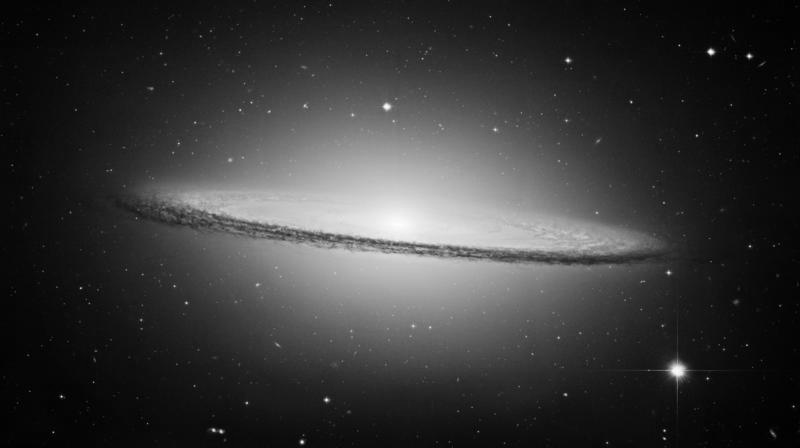

In [43]:
np.save('dump.npy', data)

data2 = np.load('dump.npy')

Image.fromarray(data2[::-1])

## Чтение NetCDF

Возьмём файл с температурой поверхности океана с [сайта UCAR](https://www.unidata.ucar.edu/software/netcdf/examples/files.html): <https://www.unidata.ucar.edu/software/netcdf/examples/tos_O1_2001-2002.nc>

In [51]:
from scipy.io import netcdf

with netcdf.netcdf_file('tos_O1_2001-2002.nc', mmap=False) as netcdf_file:
    print("Dimension: {}".format(netcdf_file.dimensions))
    variables = netcdf_file.variables
    for v in variables:
        var = variables[v]
        print("Variable {} dims {} shape {}".format(v, var.dimensions, var.data.shape))

Dimension: OrderedDict([('lon', 180), ('lat', 170), ('time', None), ('bnds', 2)])
Variable lon dims ('lon',) shape (180,)
Variable lon_bnds dims ('lon', 'bnds') shape (180, 2)
Variable lat dims ('lat',) shape (170,)
Variable lat_bnds dims ('lat', 'bnds') shape (170, 2)
Variable time dims ('time',) shape (24,)
Variable time_bnds dims ('time', 'bnds') shape (24, 2)
Variable tos dims ('time', 'lat', 'lon') shape (24, 170, 180)


In [53]:
print('единица измерения времени: ', variables['time'].units)

единица измерения времени:  b'days since 2001-1-1'


Напечатаем температуру над океаном в точке 75°0'0.0000" 75°0'0.0000" на 200-й день измерения:

In [54]:
time_index = np.searchsorted(variables['time'].data, 200)
lat_index = np.searchsorted(variables['lat'].data, 75)
lon_index = np.searchsorted(variables['lon'].data, 75)
print(variables['tos'][time_index, lat_index, lon_index])

274.5691


# Построение графиков с `matplotlib`
## Простой пример

In [45]:
# Если хотим только сохранять картинки, не хотим выводить в окошко
import matplotlib; matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 100)
u = np.sin(x)
v = np.cos(x)
plt.figure()  # новый график
plt.plot(x, u, label='sine')
plt.plot(x, v, label='cosine')
plt.legend()
plt.grid()
plt.savefig('matplotlib.png')

`matplotlib.png`
![matplotlib image](matplotlib.png)
## Контурные карты

In [46]:
grid = np.linspace(-1, 1, 10)
x, y = np.meshgrid(grid, grid)
z = np.random.rand(*x.shape)
plt.figure(figsize=(5, 5))
plt.contourf(x, y, z)
plt.grid()
plt.savefig('matplotlib_contour.png')

`matplotlib_contour.png`
![matplotlib contour](matplotlib_contour.png)

In [47]:
x = variables['lon'].data
y = variables['lat'].data
z = variables['tos'][0, :, :]

plt.figure(figsize=(10, 10))
plt.contourf(x, y, z, levels=np.linspace(270,310,256))
plt.grid()
plt.savefig('tos_contour.png')

`tos_contour.png`
![tos_contour image](tos_contour.png)